In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from matplotlib.dates import DateFormatter, YearLocator
from sklearn.metrics import mean_squared_error

## <font color ='red'>Problem 1 $\downarrow$</font>
### We noticed that the Signals for the last few days (6 to be exact) are zero

In [2]:
data = pd.read_csv("QF632_Project_1.csv")
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y")
data = data.set_index("Date")
data

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...
2019-12-30,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
2019-12-31,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
2020-01-02,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946


## <font color ='red'>Problem 2 $\downarrow$</font>
### Here we observe that Adj Close minimum value is -152.277847. Stock prices are non-negative and hence this is incorrect

In [3]:
data.describe()

,Signal,Open,High,Low,Close,Adj Close
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,16.766190,141.847360,142.691801,140.907746,141.840973,136.341060
std,3.095783,18.475574,18.470255,18.404504,18.497010,21.427837
min,0.000000,94.080002,95.400002,93.639999,94.790001,-152.277847
25%,14.691150,132.132496,132.912495,130.542503,131.824993,125.290491
50%,17.298240,146.769997,147.959999,145.634995,146.885002,142.667732
75%,19.030890,155.367496,156.287495,154.422500,155.289993,151.798325
max,35.434147,172.789993,173.389999,171.949997,196.279999,168.842270


## We reconfirm the count of zeroes, infinities and Nan for each column below

In [4]:
#check for zero, infinities and Nan for each column

def count_infinities(column):
    count = sum(np.isinf(column.values))
    return count

for column in data.columns:
    zeros = (data[column].astype(int) == 0).sum()
    infinities = count_infinities(data[column])
    Nan= data[column].isna().sum()
    negative_rows = data[data[column] < 0]
    if not negative_rows.empty:
        print(negative_rows.index)
    print(f"Column: {column} | Zeros: {zeros} | Infinities: {infinities} | Nan: {Nan} | Rows that are negative: {[i for i in negative_rows.index]}")

Column: Signal | Zeros: 6 | Infinities: 0 | Nan: 0 | Rows that are negative: []
Column: Open | Zeros: 0 | Infinities: 0 | Nan: 0 | Rows that are negative: []
Column: High | Zeros: 0 | Infinities: 0 | Nan: 0 | Rows that are negative: []
Column: Low | Zeros: 0 | Infinities: 0 | Nan: 0 | Rows that are negative: []
Column: Close | Zeros: 0 | Infinities: 0 | Nan: 0 | Rows that are negative: []
DatetimeIndex(['2018-10-10'], dtype='datetime64[ns]', name='Date', freq=None)
Column: Adj Close | Zeros: 0 | Infinities: 0 | Nan: 0 | Rows that are negative: [Timestamp('2018-10-10 00:00:00')]


### Given that there is only one negative value, we concluded that it could have been an entry error. The value itself is consistent with the overall data and thus we flip the value to positive.

In [5]:
data = abs(data)
data

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...
2019-12-30,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
2019-12-31,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
2020-01-02,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946


## EDA with Box and Whisker Plot

## <font color ='red'>Problem 3 $\downarrow$</font>
### From below B&W plots, there seems to be outliers scattered across the dataset.

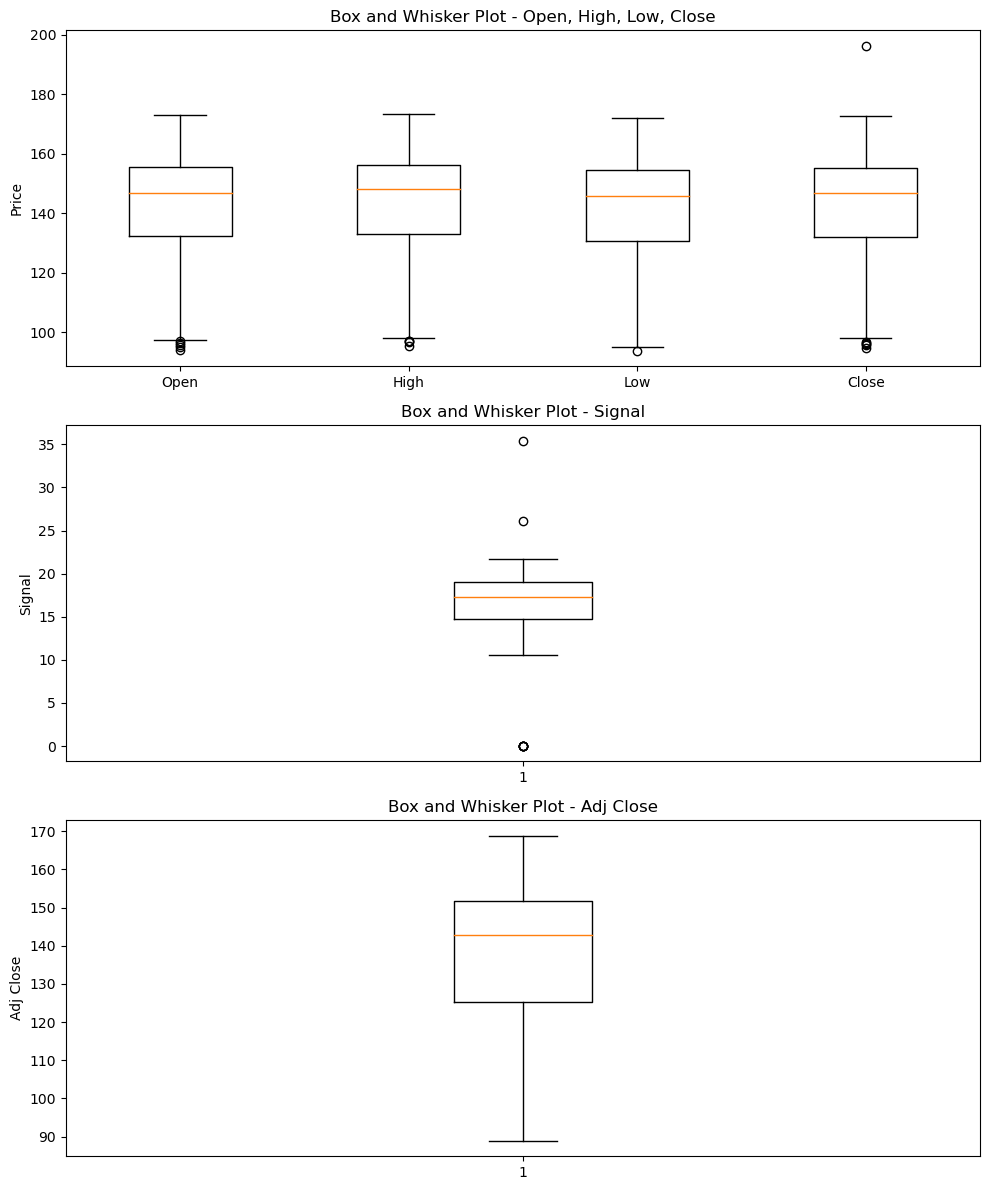

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plotting Box and Whisker for Open, High, Low, Close
box_data = [data['Open'], data['High'], data['Low'], data['Close']]
ax1.boxplot(box_data, labels=['Open', 'High', 'Low', 'Close'])
ax1.set_ylabel('Price')
ax1.set_title('Box and Whisker Plot - Open, High, Low, Close')

# Plotting Box and Whisker for Signal
ax2.boxplot(data['Signal'])
ax2.set_ylabel('Signal')
ax2.set_title('Box and Whisker Plot - Signal')

# Plotting Box and Whisker for Adj Close
ax3.boxplot(data['Adj Close'])
ax3.set_ylabel('Adj Close')
ax3.set_title('Box and Whisker Plot - Adj Close')

plt.tight_layout()
plt.show()

#Closing has some outliers near to 200
#Adj close has an anomaly where price is negative
#Signal has 3 extreme outliers

## We will explore these outliers further using 99th quantile and visualize them with a time-series plot.

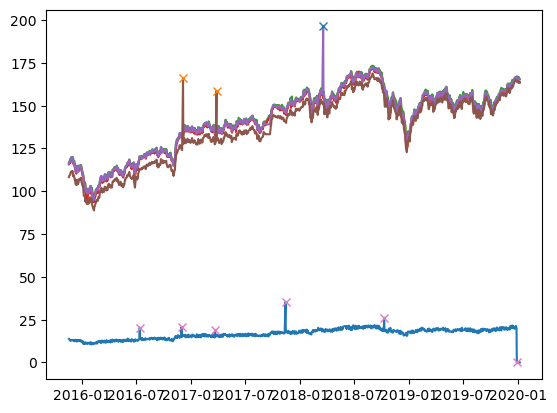

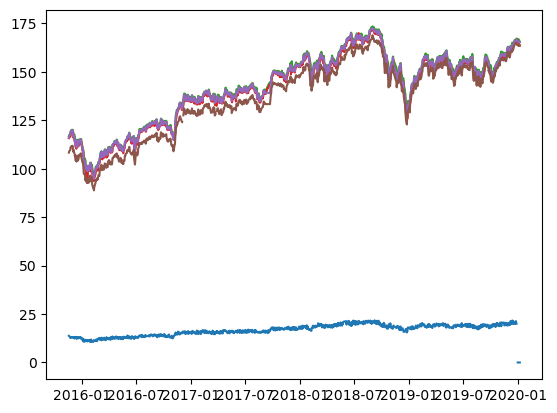

In [7]:
col = "Adj Close"

def no_lookahead_q_check(df, q=0.99, ratio=2):
    u_q = max(q, 1-q)
    d_q = min(q, 1-q)

    above = (df.pct_change() > df.pct_change().quantile(u_q) * ratio)
    below = (df.pct_change() < df.pct_change().quantile(d_q) * ratio)

    invalid_bool = above | below

    after_invalid = invalid_bool & invalid_bool.shift(1)

    return invalid_bool & (~after_invalid)


def pct_change_quantile_check(df, q=0.99, ratio=2):

    u_q = max(q, 1-q)
    d_q = min(q, 1-q)

    above = (df.pct_change() > df.pct_change().quantile(u_q) * ratio)
    below = (df.pct_change() < df.pct_change().quantile(d_q) * ratio)

    # invalid_bool = above | below
    # invalid_bool = invalid_bool & invalid_bool.shift(-1)

    return above

# bool_series = pct_change_quantile_check(data)["Adj Close"]
# data["Adj Close"].loc[bool_series]

# pct_change_quantile_check(data)
no_outlier_df = data.copy()

plt.plot(no_outlier_df)
plt.plot(no_outlier_df[no_lookahead_q_check(no_outlier_df, ratio=2.5)], "x")

plt.show()

# no_outlier_df

no_outlier_df[no_lookahead_q_check(no_outlier_df, ratio=2.5)] = np.nan

plt.plot(no_outlier_df)

plt.show()

## Next, we check for more dubious data values

In [8]:
#data should always change
no_outlier_df[no_outlier_df.diff() == 0] = np.nan
no_outlier_df

,Signal,Open,High,Low,Close,Adj Close
Date,,,,,,
2015-11-19,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
2015-11-20,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2015-11-23,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
2015-11-24,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
2015-11-25,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...
2019-12-30,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
2019-12-31,NaN,165.080002,166.350006,164.710007,165.669998,163.851135
2020-01-02,NaN,166.740005,166.750000,164.229996,165.779999,163.959946


## <font color ='red'>Problem 4 $\downarrow$</font>
### The NaN values represent instances where the values match those of the immediately preceding observations. The Closing prices in September 2017 are a particularly curious case.

In [9]:
no_outlier_df.loc[no_outlier_df.isna().any(axis=1)].drop(["Signal", "Adj Close"], axis=1)

,Open,High,Low,Close
Date,,,,
2016-07-13,120.330002,120.389999,118.949997,119.250000
2016-08-03,119.370003,120.500000,NaN,120.449997
2016-08-19,122.769997,123.070000,122.279999,NaN
2016-08-30,123.830002,NaN,123.379997,123.930000
2016-11-08,118.300003,119.459999,NaN,118.879997
2016-11-30,132.919998,NaN,131.500000,131.610001
2016-12-05,131.970001,133.330002,131.889999,133.149994
2017-03-22,133.710007,134.309998,132.779999,134.000000
2017-03-27,132.759995,135.070007,132.399994,134.740005


## <font color ='red'>Problem 5 $\downarrow$</font>
### Below we have the ratio between Close and Adj Close, as prices are adjusted to corporate action events. There is one suspicious sharp drop on 31 Aug 2018. Drilling down we found that the Close price on that day is lower than its t-1 & t+1, but in contrast the Adj price is higher than its t-1 & t+1.

<Axes: title={'center': 'Close/Adj Close'}, xlabel='Date'>

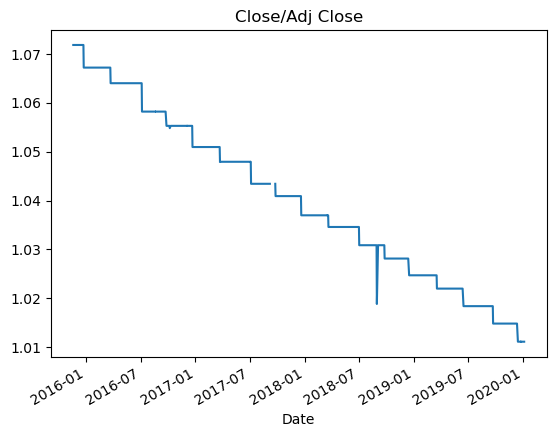

In [10]:
(no_outlier_df["Close"]/ no_outlier_df["Adj Close"]).plot(title='Close/Adj Close')

## <font color ='red'>Problem 6 $\downarrow$</font>
### Here, we handle inconsistent data values and stabilize its moments (e.g., highs that are not the maximum value and conversely lows that are not the min values)

### Shifting high and low to max and min value

In [11]:
wrong_high = (no_outlier_df[["Open", "Low", "Close"]].max(1) > no_outlier_df["High"])
no_outlier_df.loc[wrong_high]
impute_high = no_outlier_df.loc[wrong_high, ["Open", "Low", "Close"]].max(1)

wrong_low = (no_outlier_df[["Open", "High", "Close"]].min(1) < no_outlier_df["Low"])
no_outlier_df.loc[wrong_low]
impute_low = no_outlier_df.loc[wrong_low, ["Open", "High", "Close"]].min(1)

### Shift and scale so that Open-High-Low and Close of each rows are 0 mean and 1 variance

In [12]:
to_impute = no_outlier_df[['Open', 'High', 'Low', 'Close']].copy()
to_impute.loc[wrong_high, 'High'] = impute_high
to_impute.loc[wrong_low, 'Low'] = impute_low
# to_impute['Prev Close'] = to_impute['Close'].shift(1)
offset = to_impute.mean(1)
scale = to_impute.std(1)

#demean and de-variance by each row (not each columns) to make imputation easier
to_impute = (to_impute - offset.values[:,np.newaxis])/scale.values[:,np.newaxis]

In [13]:
to_impute.describe()

,Open,High,Low,Close
count,1034.000000,1035.000000,1033.000000,1024.000000
mean,-0.004109,1.042294,-1.088861,0.049090
std,0.575774,0.191684,0.195598,0.556173
min,-1.153815,0.500000,-1.500000,-1.152332
25%,-0.563241,0.898183,-1.243360,-0.486015
50%,-0.010247,1.010478,-1.067564,0.100116
75%,0.553083,1.174318,-0.930784,0.581002
max,1.151899,1.498567,-0.537230,0.865693


## <font color ='red'>Data Imputation</font>
### Once we have handled the inconsistencies in our dataset, we will now implement imputation by leveraging sklearn's Random Forest Regressor and Iterative Imputer libraries.

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(128, min_samples_leaf=0.01, random_state=420))
# imputer = IterativeImputer() #uses bayesian ridge by default
imputed_ohlc = imputer.fit_transform(to_impute)
imputed_ohlc = pd.DataFrame((imputed_ohlc*scale.values[:,np.newaxis]) + offset.values[:,np.newaxis], 
                            index=to_impute.index, columns=to_impute.columns)
imputed_ohlc

,Open,High,Low,Close
Date,,,,
2015-11-19,116.440002,116.650002,115.739998,116.059998
2015-11-20,116.480003,117.360001,116.379997,116.809998
2015-11-23,116.709999,117.889999,116.680000,117.389999
2015-11-24,116.879997,118.419998,116.559998,118.250000
2015-11-25,118.300003,119.320000,118.110001,119.169998
...,...,...,...,...
2019-12-30,165.979996,166.210007,164.570007,165.440002
2019-12-31,165.080002,166.350006,164.710007,165.669998
2020-01-02,166.740005,166.750000,164.229996,165.779999


### And visualize the imputed dataframe

<Axes: xlabel='Date'>

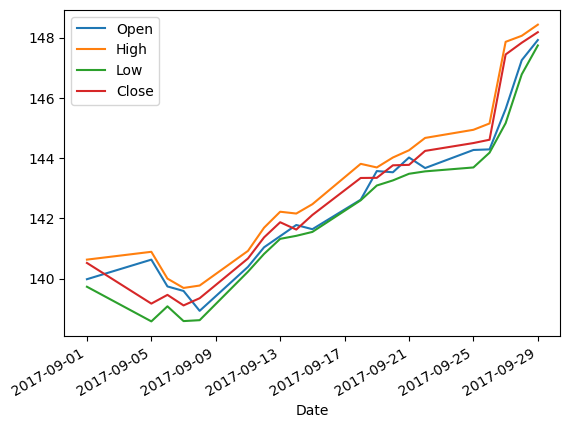

In [15]:
imputed_ohlc.loc['2017-09-01':'2017-09-30'].plot()

In [16]:
(no_outlier_df['Adj Close']/no_outlier_df['Close']).loc['2018-08-30':]

Date
2018-08-30    0.970074
2018-08-31    0.981527
2018-09-04    0.970074
2018-09-05    0.970074
2018-09-06    0.970074
                ...   
2019-12-30    0.989021
2019-12-31    0.989021
2020-01-02    0.989021
2020-01-03    0.989021
2020-01-06    0.989021
Length: 334, dtype: float64

## Detect permanent change in adj ratio

In [17]:
all_ratio = (no_outlier_df['Adj Close']/no_outlier_df['Close'])
adj_change = all_ratio.pct_change().abs() > 1e-5
perm_change = adj_change & ~(adj_change.shift(-1).fillna(False))
adj_ratio = (no_outlier_df['Adj Close']/no_outlier_df['Close'])[perm_change]
adj_ratio.loc[all_ratio.index[0]] = all_ratio.iloc[0]
adj_ratio

Date
2015-12-24    0.937029
2016-03-23    0.939842
2016-07-06    0.945004
2016-09-26    0.947616
2016-10-10    0.947616
2016-12-22    0.951525
2017-03-24    0.954265
2017-07-06    0.958387
2017-09-26    0.960707
2017-12-21    0.964348
2018-03-22    0.966574
2018-07-03    0.970074
2018-09-04    0.970074
2018-09-26    0.972649
2018-12-17    0.975904
2019-03-20    0.978505
2019-06-17    0.981955
2019-09-24    0.985406
2019-12-16    0.989021
2015-11-19    0.932980
dtype: float64

In [18]:
no_outlier_df['Signal']

Date
2015-11-19    13.768540
2015-11-20    13.608819
2015-11-23    12.990589
2015-11-24    12.667435
2015-11-25    13.019910
                ...    
2019-12-30     0.000000
2019-12-31          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
Name: Signal, Length: 1038, dtype: float64

## Use forward fill for signal anyway

In [19]:
imputed_ohlc['Adj Ratio'] = adj_ratio
imputed_ohlc['Adj Ratio'] = imputed_ohlc['Adj Ratio'].ffill()
imputed_ohlc['Adj Close'] = imputed_ohlc['Close'] * imputed_ohlc['Adj Ratio']
imputed_ohlc = imputed_ohlc.drop('Adj Ratio', axis=1)
imputed_ohlc['Signal'] = no_outlier_df['Signal'].ffill()
imputed_ohlc['Signal'][imputed_ohlc['Signal'] == 0] = np.nan
imputed_df = imputed_ohlc.copy()
imputed_df

,Open,High,Low,Close,Adj Close,Signal
Date,,,,,,
2015-11-19,116.440002,116.650002,115.739998,116.059998,108.281601,13.768540
2015-11-20,116.480003,117.360001,116.379997,116.809998,108.981336,13.608819
2015-11-23,116.709999,117.889999,116.680000,117.389999,109.522465,12.990589
2015-11-24,116.879997,118.419998,116.559998,118.250000,110.324828,12.667435
2015-11-25,118.300003,119.320000,118.110001,119.169998,111.183167,13.019910
...,...,...,...,...,...,...
2019-12-30,165.979996,166.210007,164.570007,165.440002,163.623681,NaN
2019-12-31,165.080002,166.350006,164.710007,165.669998,163.851152,NaN
2020-01-02,166.740005,166.750000,164.229996,165.779999,163.959945,NaN


<Axes: xlabel='Date'>

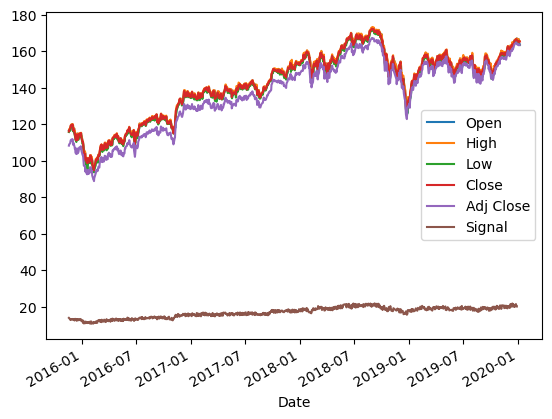

In [20]:
imputed_df.plot()

## <font color ='red'>Signal Predictive Powers</font>
### Test out the reliability of Signal to predict prices via closed-form linear regression

In [21]:
y = imputed_df.dropna().shift(1).dropna().drop("Signal", axis=1)
X = imputed_df.dropna().dropna()["Signal"].to_frame()
X['const'] = 1

idx = sorted(set(y.index.to_list()) & set(X.index.to_list()))
y = y.reindex(idx)
X = X.reindex(idx)

linreg_df = np.linalg.solve(X.T @ X, X.T) @ y
linreg_df

,Open,High,Low,Close,Adj Close
0,6.386965,6.404012,6.356303,6.382141,6.775518
1,34.211812,34.770223,33.782148,34.279378,22.399816


## Visualize Actual vs Predicted prices

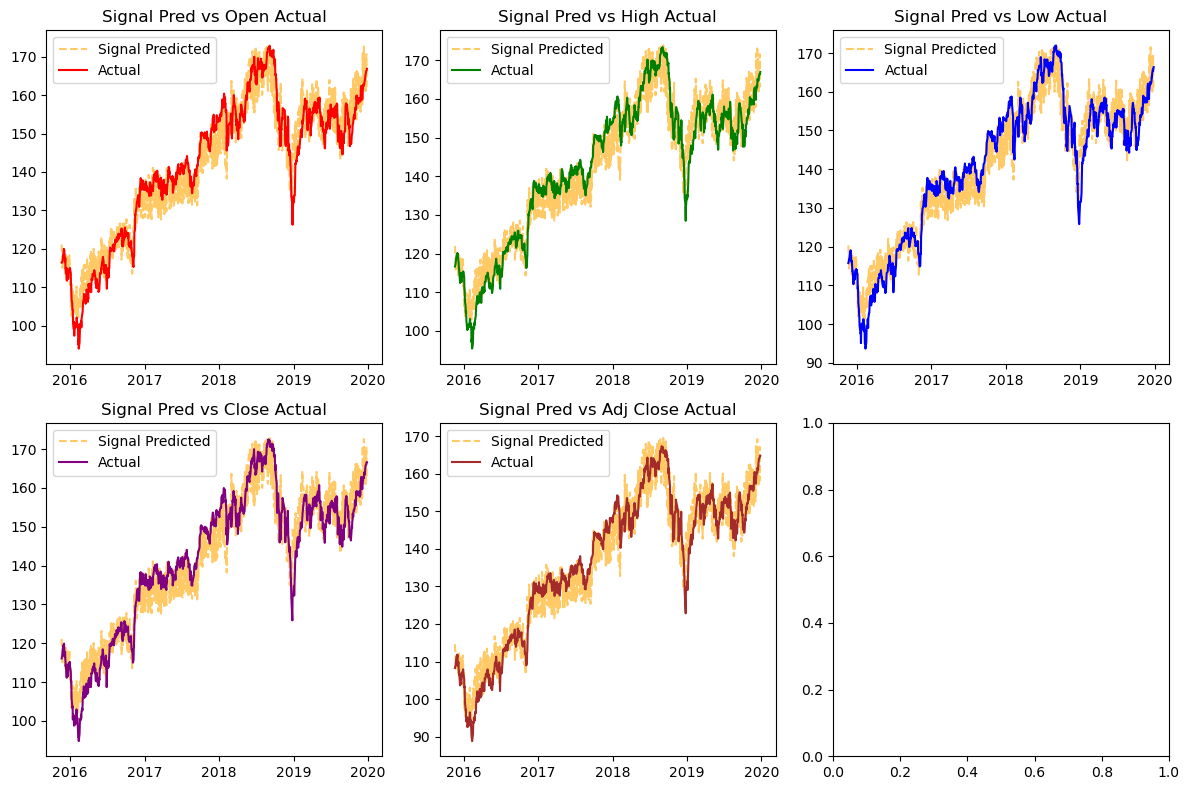

In [22]:
colors = itertools.cycle(['red', 'green', 'blue', 'purple', 'brown', 'gray'])

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, (col, (coef, const)) in enumerate(linreg_df.items()):
    ax_row = i // 3
    ax_col = i % 3

    ax = axs[ax_row, ax_col]

    # Plot Regression line
    ax.plot((X["Signal"] * coef) + const, color='orange', label='Signal Predicted', linestyle='--', alpha=0.6)

    # Set title and color
    ax.set_title(f"Signal Pred vs {col} Actual")
    if col != "Signal":
        color = next(colors)
        ax.plot(y[col], color=color, label=f'Actual')

    ax.legend()
    # Set x-axis ticks to display only years
    years = mdates.YearLocator()
    ax.xaxis.set_major_locator(years)

plt.tight_layout()
plt.show()


In [23]:
imputed_df.diff().kurtosis()

Open         2.719406
High         2.405997
Low          1.386058
Close        1.961706
Adj Close    2.073994
Signal      -0.401979
dtype: float64

In [24]:
((imputed_df["Signal"] * coef) + const).pct_change()

Date
2015-11-19         NaN
2015-11-20   -0.009354
2015-11-23   -0.036550
2015-11-24   -0.019830
2015-11-25    0.022066
                ...   
2019-12-30    0.000000
2019-12-31    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-06    0.000000
Name: Signal, Length: 1038, dtype: float64

## <font color ='red'>Time Series Analysis</font>
### Based on linear regression analysis above, we are NOT convinced that the signal provided can reliably predict the price movements. 

### As such, we move on to time series modelling by first plotting each dataset's ACF and PACF.

In [25]:
# use auto arima to predict the price of the high open low adj close using the signals as the input features
# SARIMAX

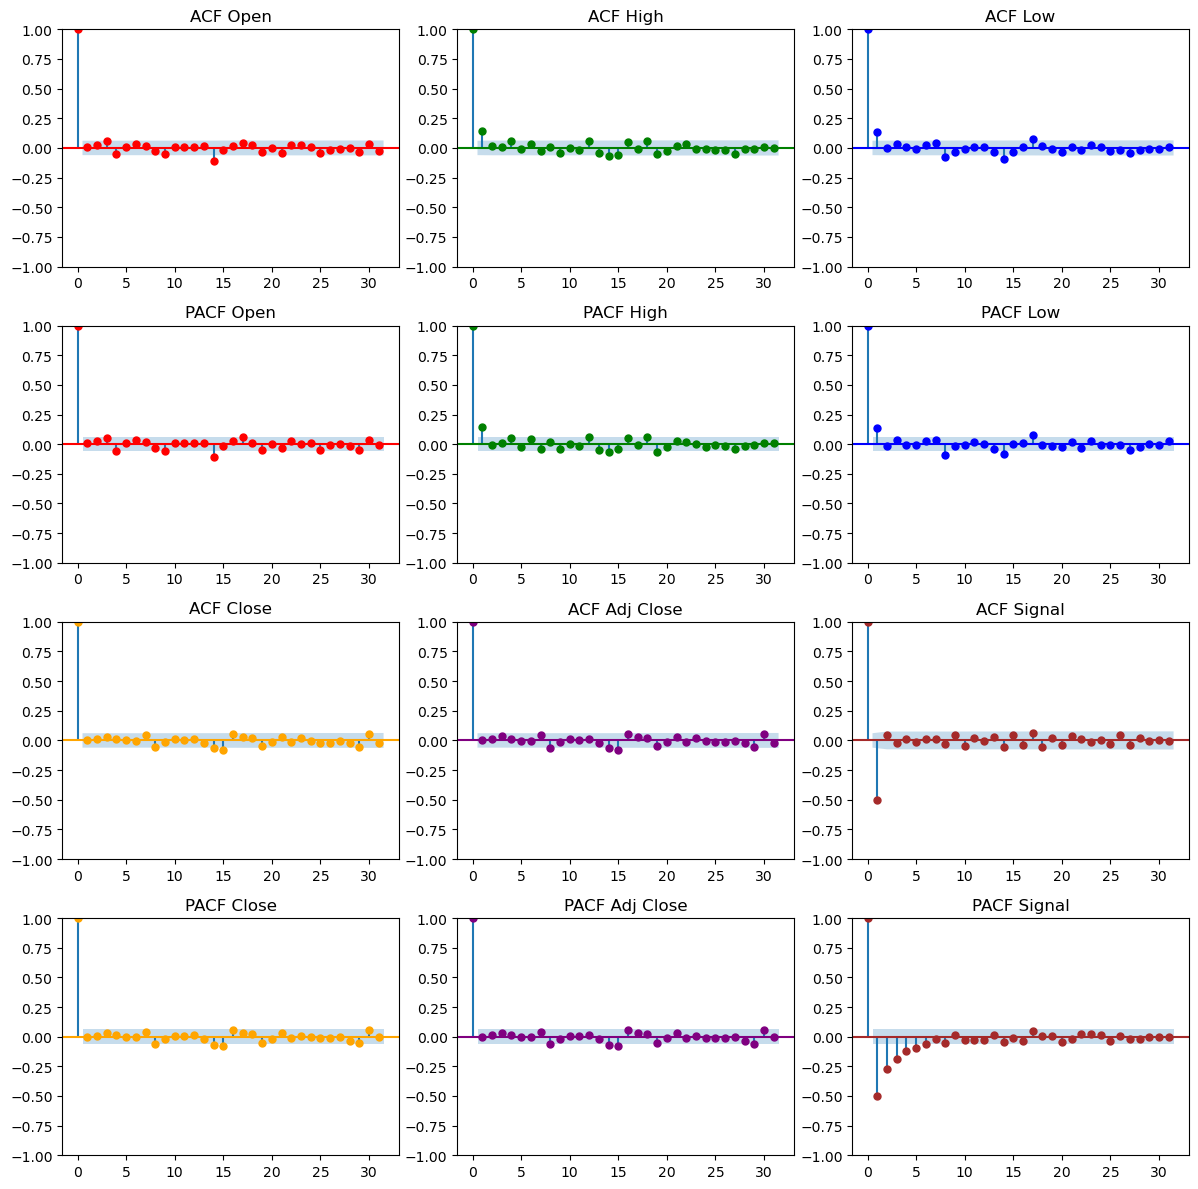

In [26]:
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple', 'brown', 'gray'])

fig, axs = plt.subplots(4, 3, figsize=(12, 12))

for i, (col, series) in enumerate(imputed_df.items()):
    ax_row = i // 3
    ax_col = i % 3

    ax_acf = axs[2 * ax_row, ax_col]
    ax_pacf = axs[2 * ax_row + 1, ax_col]

    color = next(colors)

    sm.graphics.tsa.plot_acf(np.log(series).diff().dropna(), ax=ax_acf, title="ACF " + col, color=color)
    sm.graphics.tsa.plot_pacf(np.log(series).diff().dropna(), ax=ax_pacf, title="PACF " + col, color=color)

plt.tight_layout()
plt.show()

## <font color ='red'>Problem 7 $\uparrow$</font>
### From the above, there is evidence of MA(1) in the Signal's correlogram. We also observe the ARIMA(1,0,1) in High and Low prices.

In [27]:
## ARIMA modelling for Price Prediction goes here

In [28]:
def stationarity_test(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = print("The p-value for this dataset is", dftest[1])
    p_value = dftest[1]
    critical_value = dftest[4]['5%']
    if (p_value < 0.05) and (adf < critical_value):   ### and because statsmodel adfuller p-value is not as accurate
        print('The series is stationary')
    else:
        print('The series is NOT stationary')
    return pvalue

In [29]:
stationarity_test(imputed_df["Open"])
stationarity_test(imputed_df["High"])
stationarity_test(imputed_df["Low"])
stationarity_test(imputed_df["Close"])
stationarity_test(imputed_df["Adj Close"])

The p-value for this dataset is 0.6168726107435036
The series is NOT stationary
The p-value for this dataset is 0.6476957376506223
The series is NOT stationary
The p-value for this dataset is 0.5944359147199346
The series is NOT stationary
The p-value for this dataset is 0.6261976679480901
The series is NOT stationary
The p-value for this dataset is 0.6844421115029717
The series is NOT stationary


#### Applying one differencing, let's check the stationarity of the data again

In [30]:
stationarity_test(imputed_df["Open"].diff().dropna())

stationarity_test(imputed_df["High"].diff().dropna())

stationarity_test(imputed_df["Low"].diff().dropna())

stationarity_test(imputed_df["Close"].diff().dropna())

stationarity_test(imputed_df["Adj Close"].diff().dropna())

The p-value for this dataset is 6.930507263967083e-16
The series is stationary
The p-value for this dataset is 0.0
The series is stationary
The p-value for this dataset is 0.0
The series is stationary
The p-value for this dataset is 0.0
The series is stationary
The p-value for this dataset is 0.0
The series is stationary


In [31]:
endog_df = imputed_df.drop(columns = ["Signal"])
endog_df_matched = endog_df[:-5] # to match the number of endog variables to excluding the rows with the NaN signals

#### to match the number of columns as exog

In [32]:
endog1 = endog_df_matched["Open"]
endog2 = endog_df_matched["High"]
endog3 = endog_df_matched["Low"]
endog4 = endog_df_matched["Close"]
endog5 = endog_df_matched["Adj Close"]
exog = imputed_df["Signal"].dropna()

In [33]:
endogs = [endog1, endog2, endog3, endog4, endog5]
models = []

for endog in endogs:
    model = auto_arima(endog, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False)
    models.append(model)

# Access the fitted models for each endog variable
for i, model in enumerate(models):
    print(f"Model {i+1}: {model.order}")

Model 1: (0, 1, 0)
Model 2: (1, 1, 0)
Model 3: (0, 1, 1)
Model 4: (0, 1, 0)
Model 5: (0, 1, 0)


In [34]:
mod1 = sm.tsa.statespace.SARIMAX(endog1, exog, order=(0,1,0))
res1 = mod1.fit(disp=False)
print(res1.summary())
mod2 = sm.tsa.statespace.SARIMAX(endog2, exog, order=(1,1,0))
res2 = mod2.fit(disp=False)
print(res2.summary())
mod3 = sm.tsa.statespace.SARIMAX(endog3, exog, order=(0,1,1))
res3 = mod3.fit(disp=False)
print(res3.summary())
mod4 = sm.tsa.statespace.SARIMAX(endog4, exog, order=(0,1,0))
res4 = mod4.fit(disp=False)
print(res4.summary())
mod5 = sm.tsa.statespace.SARIMAX(endog5, exog, order=(0,1,0))
res5 = mod5.fit(disp=False)
print(res5.summary())

C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1033
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1819.168
Date:                Mon, 19 Jun 2023   AIC                           3642.337
Time:                        17:37:58   BIC                           3652.215
Sample:                             0   HQIC                          3646.085
                               - 1033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Signal         0.0217      0.054      0.403      0.687      -0.084       0.127
sigma2         1.9890      0.057     34.659      0.000       1.877       2.101
Ljung-Box (L1) (Q):                   0.05   Jarque-

C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1033
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1827.697
Date:                Mon, 19 Jun 2023   AIC                           3659.393
Time:                        17:37:59   BIC                           3669.272
Sample:                             0   HQIC                          3663.142
                               - 1033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Signal         0.0178      0.054      0.327      0.744      -0.089       0.125
sigma2         2.0222      0.065     31.049      0.000       1.895       2.150
Ljung-Box (L1) (Q):                   0.02   Jarque-

C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\final\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
predictions = []

for i in range(1, 6):
    model = eval(f"res{i}")
    pred = model.predict()
    predictions.append(pred)

# # Access the predictions for each model
# for i, pred in enumerate(predictions):
#     print(f"Predictions for Model {i+1}:")
#     print(pred)

In [36]:
#drop the first value of the prediction
modified_prediction = [sublist[1:] for sublist in predictions]

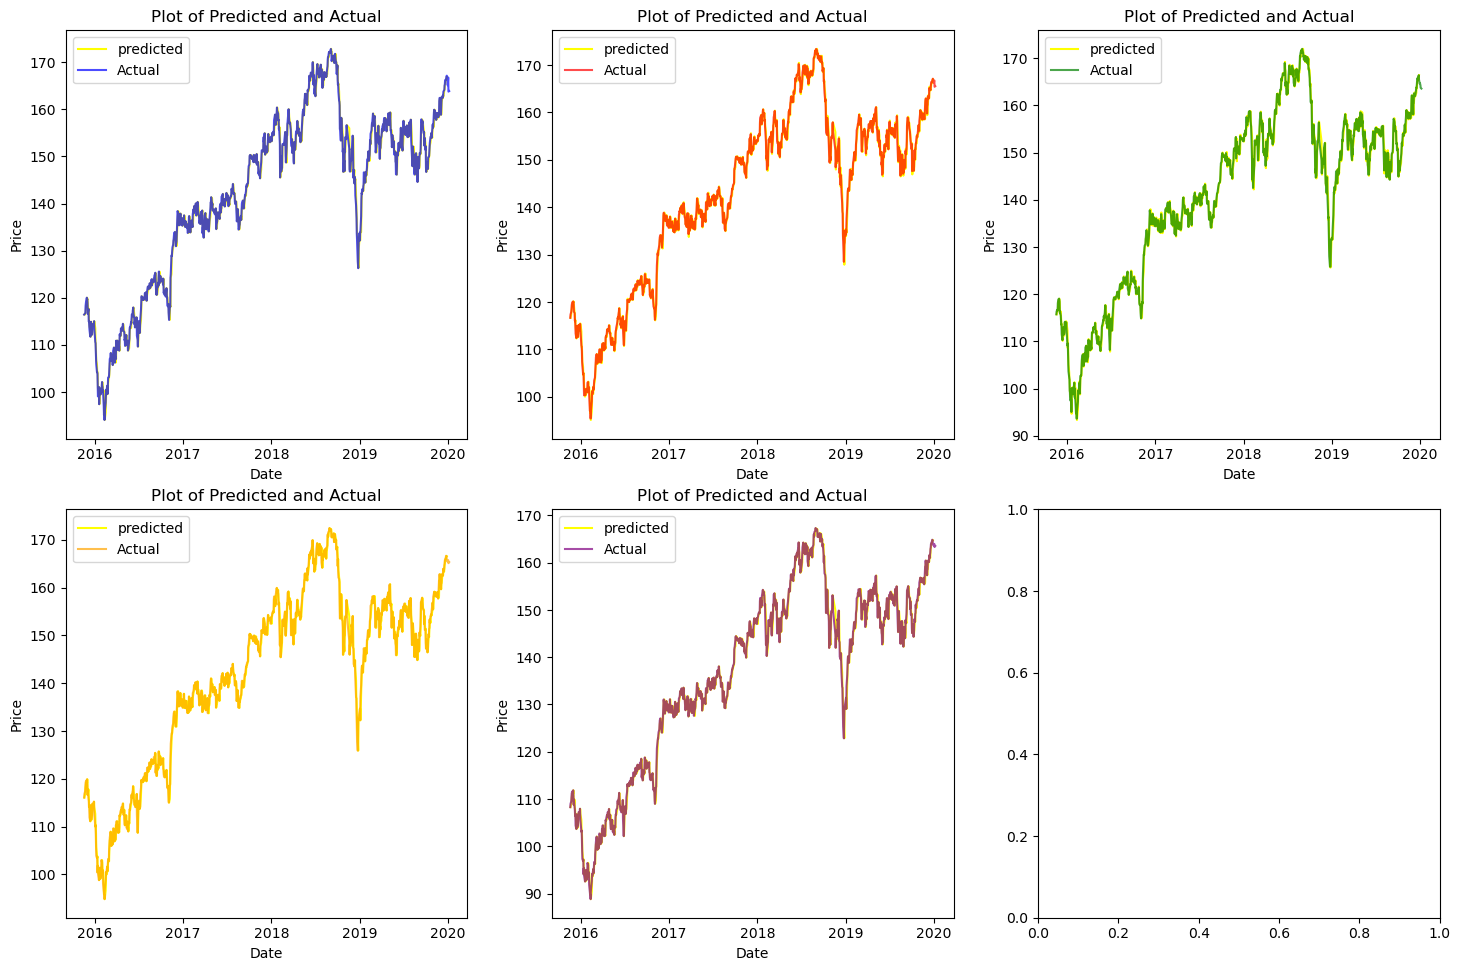

In [37]:
colors = ['blue', 'red', 'green', 'orange', 'purple']
num_plots = len(modified_prediction)
num_plots_per_row = 3
num_rows = (num_plots + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
fig.tight_layout(pad=3.0)

for i in range(num_plots):
    row = i // num_plots_per_row
    col = i % num_plots_per_row

    ax = axes[row, col]
    ax.plot(modified_prediction[i], label='predicted', color="yellow")
    ax.plot(imputed_df.iloc[:, i], label='Actual', color=colors[i], alpha = 0.7)

    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Plot of Predicted and Actual')

    date_form = DateFormatter("%Y")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(YearLocator())

plt.show()

## <font color ='red'>Log Return Relationship with Log Signal (WIP) $\downarrow$</font>
### Below code is modelling for RETURNS. To be conducted once we are done with time series modelling for PRICES above.

In [38]:
data['log_return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data['log_signal'] = np.log(data['Signal'] / data['Signal'].shift(1))

#drop the first na from log_return
data=data.dropna()

#change the last infinity to 0
data['log_signal']=data['log_signal'].replace([np.inf, -np.inf], 0)

C:\Users\final\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\final\AppData\Local\Temp\ipykernel_6312\3903127258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_signal']=data['log_signal'].replace([np.inf, -np.inf], 0)


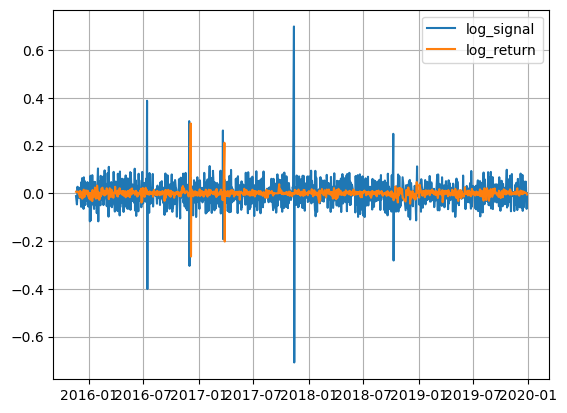

In [39]:
plt.plot(data['log_signal'], label='log_signal')
plt.plot(data['log_return'], label='log_return')
plt.legend()
plt.grid(True)
plt.show()

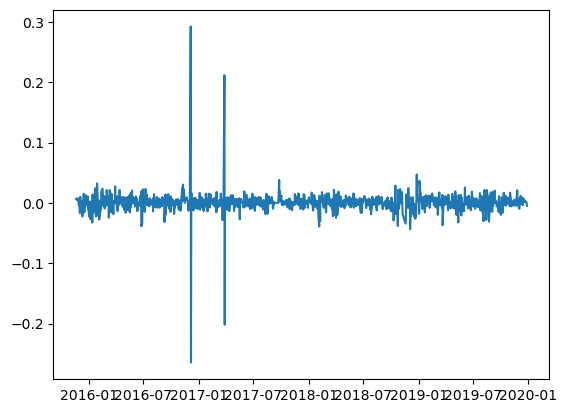

In [40]:
plt.plot(data['log_return'], label='log_return')
plt.show()

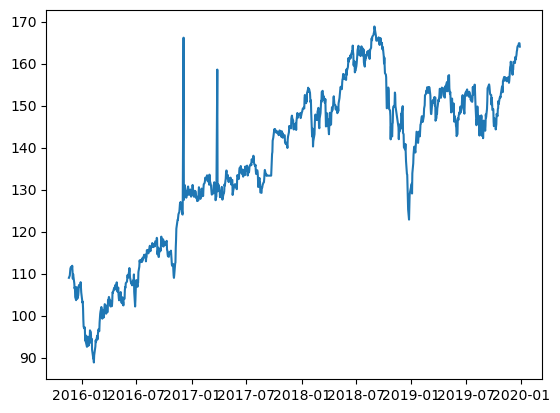

In [41]:
plt.plot(data["Adj Close"])

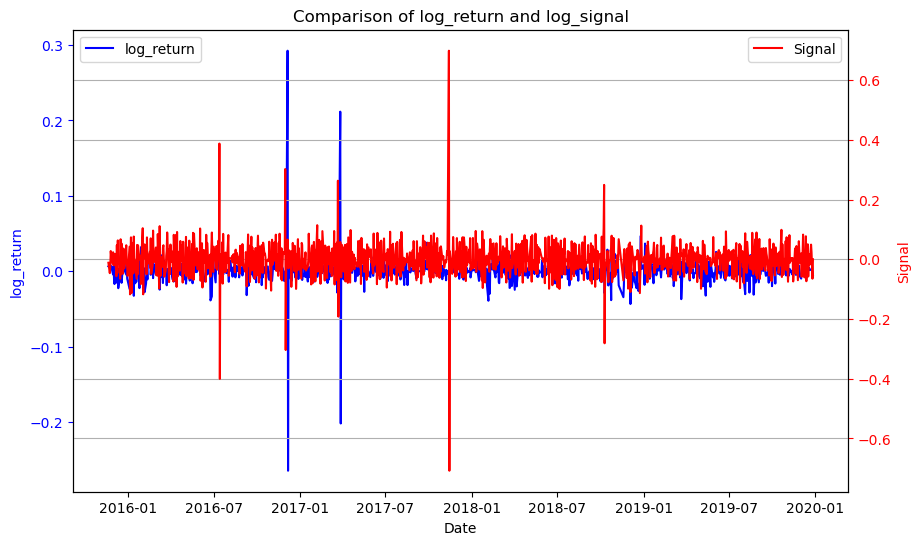

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot log_return
ax1.plot(data.index, data['log_return'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('log_return', color='blue')
ax1.tick_params(axis='y', colors='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot Signal
ax2.plot(data.index, data['log_signal'], color='red')
ax2.set_ylabel('Signal', color='red')
ax2.tick_params(axis='y', colors='red')

# Add a legend
ax1.legend(['log_return'], loc='upper left')
ax2.legend(['Signal'], loc='upper right')

plt.title('Comparison of log_return and log_signal')
plt.grid(True)
plt.show()


In [43]:
actual_log_returns = data['log_return']
predicted_log_returns = data['log_signal']

# Calculate the mean squared error
mse = mean_squared_error(actual_log_returns, predicted_log_returns)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.004037717048398786
